Please fill this part


*   Full Name: Yash Dani
*   Student Number: 218462531

Change file name to yourlast name followed by studentID in the following format and then submit LASTNAME_STUDENTID.ipynb.

Install profiling
https://github.com/ydataai/ydata-profiling

In [113]:
!pip install ydata-profiling
!pip install --upgrade typing-extensions



To initiate a session restart, go to Runtime > Restart Session. Occasionally, the impact of installed libraries may not be visible until a restart is performed.

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Data Transfer: Moving Data from Google Drive to the Current Directory ( 5 pt)
In this section, we will transfer data from Google Drive to the current working directory and Unzip it. Let's assume that the data is located in "/content/drive/MyDrive/HW2/HW2_Data.zip".

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
################################################################################
## TODO: Use Linux command to transfer and unzip data
################################################################################
# zip file location should be :  "/content/drive/MyDrive/HW2/HW2_Data.zip"
# destination directory for unzipping should be  =>  "/content/"
!cp /content/drive/MyDrive/HW2/HW2_Data.zip /content/
!unzip /content/HW2_Data.zip -d /content/





Archive:  /content/HW2_Data.zip
replace /content/Dataset_Description.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Dataset_Description.pdf  
replace /content/Heart_Disease_Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Heart_Disease_Dataset.csv  


## Load Data ( 5 pt)
load data in pandas dataframe

In [118]:
################################################################################
## TODO: load and display dataframe
################################################################################
# Load the dataset
file_path = '/content/Heart_Disease_Dataset.csv'
heart_disease_data = pd.read_csv(file_path)

# Display the dataset
heart_disease_data




,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Explore data by ProfileReport ( 5 pt)
https://github.com/ydataai/ydata-profiling

Just simply run ProfileReport in 2 lines

In [119]:
################################################################################
## TODO: Use profiler in 2 line and explore the data
################################################################################
profile = ProfileReport(heart_disease_data, title="Profiling Report")
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Explore data by Panda ( 5pt )

shape of dataset is: (1190, 12)
--------------------------------------------------
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
this dataset has not missing value.
--------------------------------------------------
target
1    629
0    561
Name: target, dtype: int64
--------------------------------------------------
--------------------- Plots --------------------------


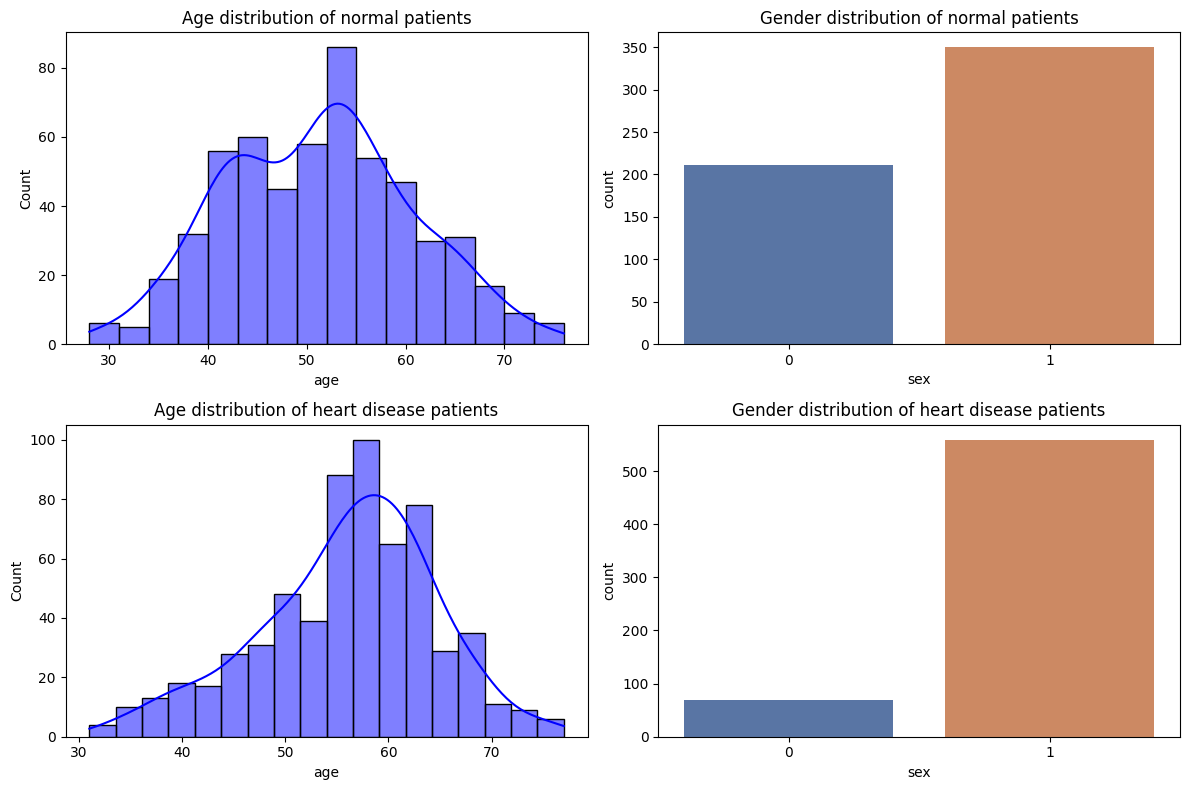

In [120]:
#############################################################################
## TODO: Find the shape of the dataset.
#############################################################################
shape = heart_disease_data.shape
print("shape of dataset is:", shape)
print("--------------------------------------------------")

#############################################################################
## TODO: Check if there are missing entries in the dataset columnwise.
#############################################################################
missing_values = heart_disease_data.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("this dataset has not missing value.")
else:
    print("this dataset has missing values.")
print("--------------------------------------------------")

#############################################################################
## TODO: Check number of positive and negative cases
#############################################################################
positive_cases = heart_disease_data[heart_disease_data['target'] == 1].shape[0]
negative_cases = heart_disease_data[heart_disease_data['target'] == 0].shape[0]
target_counts = heart_disease_data['target'].value_counts()
target_counts.name = 'target'
print(target_counts)
print("--------------------------------------------------")

#############################################################################
## TODO: plot  age distribution and gender distribution for both normal
## and heart disease patients. (2*2 plots)
#############################################################################
print("--------------------- Plots --------------------------")

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Age distribution of normal patients
sns.histplot(heart_disease_data[heart_disease_data['target'] == 0]['age'], kde=True, ax=axs[0, 0], color='b')
axs[0, 0].set_title('Age distribution of normal patients')
axs[0, 0].set_xlabel('age')
axs[0, 0].set_ylabel('Count')

# Gender distribution of normal patients
sns.countplot(x='sex', data=heart_disease_data[heart_disease_data['target'] == 0], ax=axs[0, 1], hue='sex', palette='deep', legend=False)
axs[0, 1].set_title('Gender distribution of normal patients')
axs[0, 1].set_xlabel('sex')
axs[0, 1].set_ylabel('count')

# Age distribution of heart disease patients
sns.histplot(heart_disease_data[heart_disease_data['target'] == 1]['age'], kde=True, ax=axs[1, 0], color='b')
axs[1, 0].set_title('Age distribution of heart disease patients')
axs[1, 0].set_xlabel('age')
axs[1, 0].set_ylabel('Count')

# Gender distribution of heart disease patients
sns.countplot(x='sex', data=heart_disease_data[heart_disease_data['target'] == 1], ax=axs[1, 1], hue='sex', palette='deep', legend=False)
axs[1, 1].set_title('Gender distribution of heart disease patients')
axs[1, 1].set_xlabel('sex')
axs[1, 1].set_ylabel('count')

plt.tight_layout()
plt.show()


## Split Data ( 2 pt )
Before any action you should do this step to prevent from leak of data and using test data in your tunning pipeline

In [121]:
from sklearn.model_selection import train_test_split
#############################################################################
## TODO: split dataframe into 4 dataframe X_train, X_test, y_train, y_test
## test(30%) train(70%)
# Assuming df is your DataFrame and 'target_column' is your target variable
# Split the data into training and testing sets with 0.7 to 0.3 ratio
#############################################################################
# Define features and target variable
X = heart_disease_data.drop(columns='target')
y = heart_disease_data['target']

# Split the data with a fixed random state 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the training set
X_train


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
996,39,1,4,118,219,0,0,140,0,1.2,2
852,62,0,4,160,164,0,2,145,0,6.2,3
478,61,1,4,110,0,1,0,108,1,2.0,3
1004,35,0,4,138,183,0,0,182,0,1.4,1
875,64,1,3,140,335,0,0,158,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1044,58,1,4,125,300,0,2,171,0,0.0,1
1095,55,1,2,130,262,0,0,155,0,0.0,1
1130,61,1,1,134,234,0,0,145,0,2.6,2
860,62,0,4,140,268,0,2,160,0,3.6,3


## Feature Engineering:( 8 pt)
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.

In [122]:
from sklearn.preprocessing import StandardScaler
#############################################################################
## TODO: Normalize numerical features
## Note that just numerical fetures should be normalized.
## Type of features is determined in dataset description file.
# Create a StandardScaler instance
# Fit to numerical columns of train and transform test and train based on this
## Warning:
## You can't fit your Scaler on whole data. Fit should be just on Train data.
# Print the first few rows to check the result
#############################################################################
# List of numerical features based on dataset description
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data based on the fit from the training data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Print the first few rows of the training set
print(X_train.head())

#############################################################################
## TODO: just comment name of 2 other scaler form sklearn and write one paragraph for each:
## Your Comment:
##
## MinMaxScaler
## The `MinMaxScaler` from `sklearn.preprocessing` is used to scale and translate each feature
## individually so that it falls within a specified range, typically between zero and one. This
## transformation is especially useful when the data distribution is not Gaussian and there are
## no significant outliers. By preserving the relationships between data points, it ensures that
## the original distribution's structure is maintained. This scaler is particularly effective in
## scenarios where the features need to be normalized on a consistent scale without distorting
## their original distribution.
##
## RobustScaler
## The `RobustScaler` from `sklearn.preprocessing` is designed to be robust to outliers. Unlike
## standard scaling methods that use mean and standard deviation, the `RobustScaler` employs the
## median and the interquartile range. This makes it less sensitive to outliers, ensuring that
## extreme values do not disproportionately affect the scaling process. This scaler is particularly
## useful in datasets where outliers are present and could skew the results of traditional scaling
## methods. By focusing on the central tendency and dispersion of the data, it provides a more
## resilient scaling approach.
##################################################################################


           age  sex  chest pain type  resting bp s  cholesterol  \
996  -1.566106    1                4     -0.757118     0.070043   
852   0.877897    0                4      1.522053    -0.496223   
478   0.771636    1                4     -1.191245    -2.184727   
1004 -1.991150    0                4      0.328202    -0.300604   
875   1.090419    1                3      0.436733     1.264351   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
996                     0            0       -0.024287                0   
852                     0            2        0.176820                0   
478                     1            0       -1.311377                1   
1004                    0            0        1.665018                0   
875                     0            0        0.699701                0   

       oldpeak  ST slope  
996   0.288497         2  
852   4.894054         3  
478   1.025386         3  
1004  0.472719         1  
875  -0.816

### plot correlations ( 2 pt)

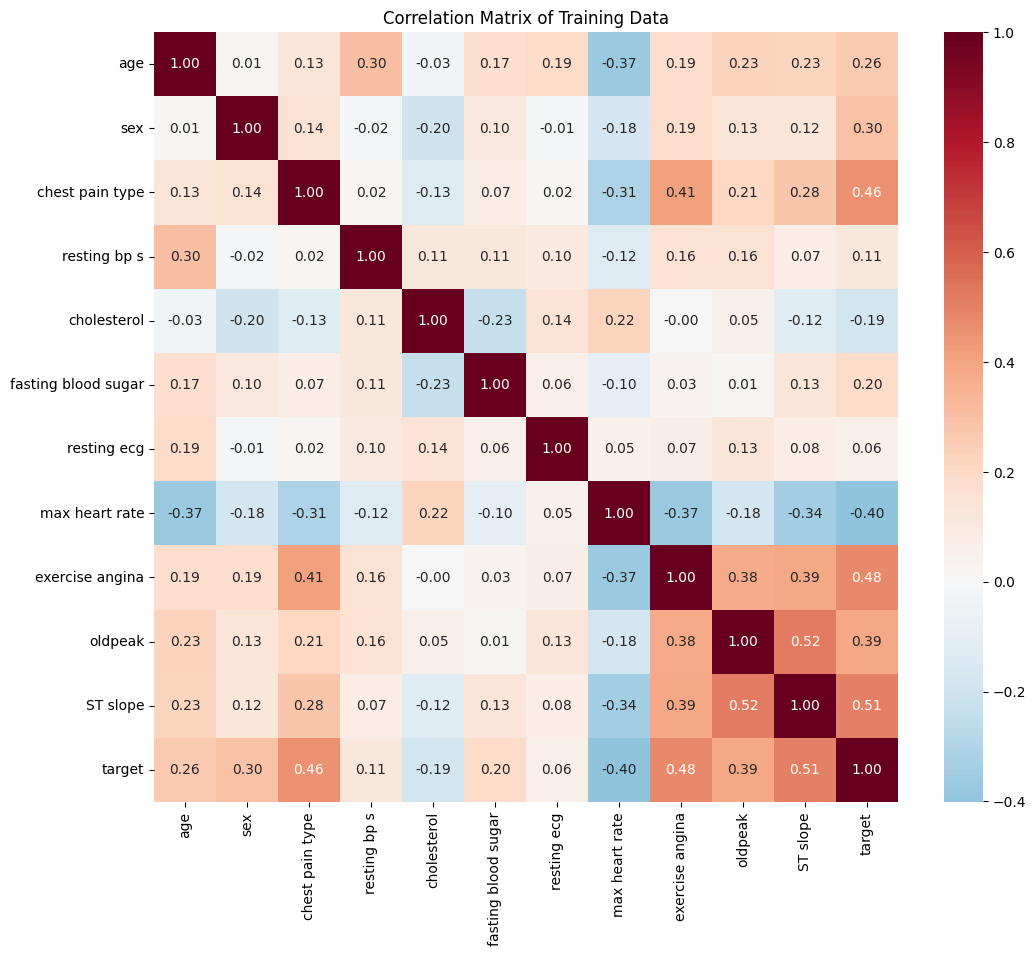

<Axes: title={'center': 'Correlation Matrix of Training Data'}>

In [123]:
#############################################################################
## TODO: Make a temp dataframe with X_train and y_train.
## plot correlation between all features
#############################################################################
# Combine X_train and y_train into a single DataFrame
temp_df = pd.concat([X_train, y_train], axis=1)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = temp_df.corr()
ax = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Correlation Matrix of Training Data')
plt.show()

ax

## Define a classification report function ( 3 pt)


In [124]:
#############################################################################
## TODO: Complete this function by considering function description
## Note: write every thing from scatch with python or numpy operators
#############################################################################

def classification_report(y_true, y_pred):


    """
    Calculate classification metrics based on true and predicted labels.

    Parameters:
    - y_true: Array of true labels (0 or 1).
    - y_pred: Array of predicted labels (0 or 1).

    Returns:
    - Accuracy: Ratio of correct predictions to total samples.
    - Precision: Accuracy of positive predictions among all predicted positives.
    - Recall: Ability to capture actual positives among all actual positives.
    - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
    - FNR: Proportion of actual positives incorrectly predicted as negatives.
    """

################### Complete this part###############################

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    F1score = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0

####################################################################


    result = {
        'Accuracy:' : Accuracy,
        'Precision:' : Precision,
        'Recall:' : Recall,
        'F1score:': F1score,
        'FNR:': FNR

    }

    return result


# Test function





# Test Case 1: Perfect predictions
y_true_1 = [1, 0, 1, 0]
y_pred_1 = [1, 0, 1, 0]
result_1 = classification_report(y_true_1, y_pred_1)
print(result_1)


# Test Case 2: Imperfect predictions
y_true_2 = [1, 0, 1, 0]
y_pred_2 = [0, 1, 1, 1]

result_2 = classification_report(y_true_2, y_pred_2)
print(result_2)





{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}
{'Accuracy:': 0.25, 'Precision:': 0.3333333333333333, 'Recall:': 0.5, 'F1score:': 0.4, 'FNR:': 0.5}


## Model Traning

### Covert data to numpy ( 2 pt)

In [125]:
#############################################################################
## TODO: convert X_train, X_test, y_train, y_test to numpy array
#############################################################################

# Convert to numpy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Check the conversion
print(type(X_train_np), type(X_test_np), type(y_train_np), type(y_test_np))


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Train Logistic Regression ( 5pt)

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8725490196078431, 'Recall:': 0.8768472906403941, 'F1score:': 0.8746928746928747, 'FNR:': 0.12315270935960591}


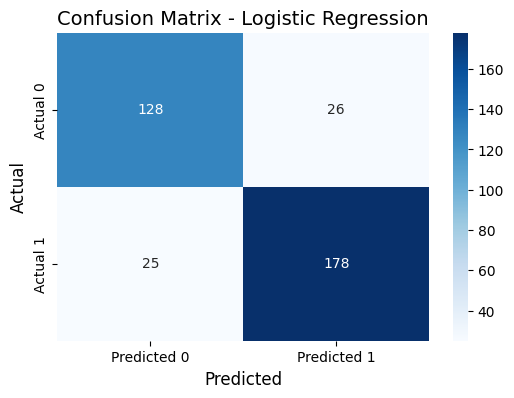

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#############################################################################
## TODO: Train a Logistic Regression Model and test your model.
## give a test report from test result by above classification_report function
## Plot the confusion matrix using seaborn
#############################################################################

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_np, y_train_np)

# Predict on test data
y_pred = log_reg.predict(X_test_np)

# Generate classification report
report = classification_report(y_test_np, y_pred)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
ax.set_title('Confusion Matrix - Logistic Regression', fontsize=14)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(['Predicted 0', 'Predicted 1'], fontsize=10)
ax.set_yticklabels(['Actual 0', 'Actual 1'], fontsize=10)
plt.show()

### Train KNN ( 5pt)

{'Accuracy:': 0.8403361344537815, 'Precision:': 0.8443396226415094, 'Recall:': 0.8817733990147784, 'F1score:': 0.8626506024096386, 'FNR:': 0.11822660098522167}


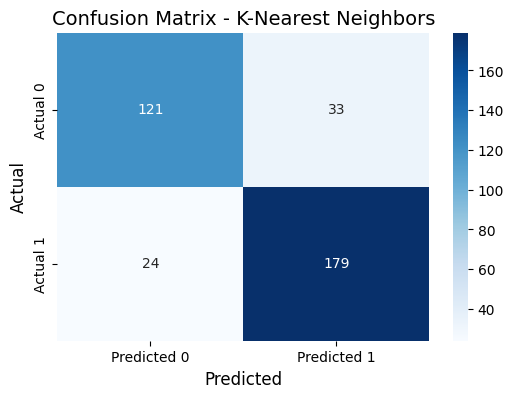

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#############################################################################
## TODO: Train a KNN Model and test your model.
## give a test report from test result by above classification_report function
## plot confusion matrix
#############################################################################

# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_np, y_train_np)

# Predict on test data
y_pred_knn = knn.predict(X_test_np)

# Generate classification report
report_knn = classification_report(y_test_np, y_pred_knn)
print(report_knn)

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test_np, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
ax.set_title('Confusion Matrix - K-Nearest Neighbors', fontsize=14)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(['Predicted 0', 'Predicted 1'], fontsize=10)
ax.set_yticklabels(['Actual 0', 'Actual 1'], fontsize=10)
plt.show()


### Train a safer model ( 3pt)

To make sure our model doesn't make dangerous mistakes, like saying a high-risk patient is healthy, we can use the class_weight option in LogisticRegression(). If the model wrongly thinks a healthy person is high-risk, it's not as big of a problem and doctors will check it!

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8762376237623762, 'Recall:': 0.8719211822660099, 'F1score:': 0.8740740740740741, 'FNR:': 0.12807881773399016}


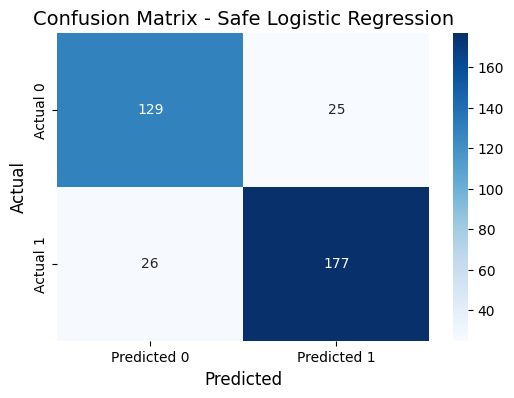

In [128]:
#############################################################################
## TODO: create a safer model with class_weight use your owen weight result is not important
## plot confusion matrix
#############################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve

# Create a safer Logistic Regression model with class_weight set to 'balanced'
# Explanation:
# We chose `class_weight='balanced'` to automatically adjust the weights inversely proportional
# to the class frequencies in the input data. This helps to address any class imbalance by giving
# more weight to the minority class (high-risk patients). This approach ensures that high-risk
# patients are less likely to be misclassified as healthy, which is crucial for preventing
# dangerous mistakes in medical diagnosis.

# Manually setting the class weights is another option where we can explicitly define
# the importance of each class (e.g., {0: 1, 1: 2}). This method provides more control over the
# weight distribution, allowing us to prioritize high-risk patients even more. However,
# in this case, we use 'balanced' for simplicity and to leverage automatic weight adjustment,
# which is generally effective for addressing class imbalance without the need for manual tuning.

# Create a safer Logistic Regression model with class_weight set to 'balanced'
safe_log_reg = LogisticRegression(class_weight='balanced', random_state=42)
safe_log_reg.fit(X_train_np, y_train_np)

# Predict on test data
y_pred_safe_log_reg = safe_log_reg.predict(X_test_np)

# Generate classification report
report_safe_log_reg = classification_report(y_test_np, y_pred_safe_log_reg)
print(report_safe_log_reg)

# Compute confusion matrix
conf_matrix_safe_log_reg = confusion_matrix(y_test_np, y_pred_safe_log_reg)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix_safe_log_reg, annot=True, fmt='d', cmap='Blues', cbar=True)
ax.set_title('Confusion Matrix - Safe Logistic Regression', fontsize=14)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(['Predicted 0', 'Predicted 1'], fontsize=10)
ax.set_yticklabels(['Actual 0', 'Actual 1'], fontsize=10)
plt.show()


### Cross Validation Score ( 5pt)

In [129]:
from sklearn.model_selection import cross_validate
#############################################################################
## TODO: research  about "K-Fold cross validation"
## cross validate your KNN model to evaluate your model better
## use accuracy and recall to report cross validation results
#############################################################################


knn = KNeighborsClassifier()

# Define the scoring metrics
scoring = ['accuracy', 'recall']

# Perform 5-Fold Cross-Validation
cv_results = cross_validate(knn, X_train_np, y_train_np, cv=5, scoring=scoring)

# Extract mean for accuracy and recall
mean_accuracy = cv_results['test_accuracy'].mean()
mean_recall = cv_results['test_recall'].mean()

print("KNN Acc: ", mean_accuracy)
print("KNN Recall : ", mean_recall)



KNN Acc:  0.8415265853834499
KNN Recall :  0.8473871409028728


### Hyperparameter Tuning Using GridSearchCV ( 5pt)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#############################################################################
## TODO: Explore GridSearchCV functionality to identify the best parameters
## (n_neighbors, weights, p) for your KNN model.
#############################################################################

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 14, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 14, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [131]:
#############################################################################
## TODO: Retrieve the best model and its parameters
#############################################################################

# The best model
best_model = grid_search.best_estimator_

# Retrieve best parameters
best_parameters = grid_search.best_params_

# Retrieve best score
best_accuracy = grid_search.best_score_

# Display best parameters and best accuracy
print("Best Parameters:", best_parameters)
print("Best accuracy:", best_accuracy)


Best Parameters: {'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
Best accuracy: 0.9135632349758314


### Cross Validation Score on Result of Gride Search ( 2pt)

In [132]:
from sklearn.model_selection import cross_val_score

#############################################################################
## TODO: Do again "K-Fold cross validation" on best KNN model of the Gride Search
#############################################################################

# Use the best model from the Grid Search
best_knn_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the best model
cv_results_accuracy = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy')
cv_results_recall = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='recall')

# Calculate mean accuracy and recall
mean_accuracy = np.mean(cv_results_accuracy)
mean_recall = np.mean(cv_results_recall)

# Print the cross-validation results
print("Grid Search KNN Accuracy: ", mean_accuracy)
print("Grid Search KNN Recall: ", mean_recall)


Grid Search KNN Accuracy:  0.9135632349758314
Grid Search KNN Recall:  0.9130506155950753


### Is the aforementioned KNN model (Best KNN) fair? ( 3 pt)
Evaluate that model perform equally on men and women or not.

In [133]:
#############################################################################
## TODO: split your test data on two split of women and men and give
## classification_report on them.
#############################################################################

# Use the best model from grid search
best_knn_model = grid_search.best_estimator_

# Convert X_test and y_test to DataFrame for easier manipulation
X_test_df = pd.DataFrame(X_test, columns=heart_disease_data.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=['target'])

# Combine X_test and y_test for easy filtering
test_data = X_test_df.copy()
test_data['target'] = y_test

# Separate the test data into male and female groups
X_test_female = test_data[test_data['sex'] == 0].drop(columns='target')
y_test_female = test_data[test_data['sex'] == 0]['target']

X_test_male = test_data[test_data['sex'] == 1].drop(columns='target')
y_test_male = test_data[test_data['sex'] == 1]['target']

# Predict and evaluate for females
y_pred_female = best_knn_model.predict(X_test_female)
result_female = classification_report(y_test_female, y_pred_female)
print("Performance of best KNN model for sex_group of '0.0':")
print(result_female)

# Predict and evaluate for males
y_pred_male = best_knn_model.predict(X_test_male)
result_male = classification_report(y_test_male, y_pred_male)
print("Performance of best KNN model for sex_group of '1.0':")
print(result_male)



#############################################################################
## TODO: write a comment and explain the result of this section in one paragraph.
## Why FNR in this dataset is important? And probably why this gap between men
## and women FNR happens
# Your Comment:
#
# The results indicate that the best KNN model performs slightly differently for males and females.
# For females (sex_group of '0.0'), the accuracy is 0.9189, precision is 0.8, recall is 0.8889,
# F1 score is 0.8421, and FNR is 0.1111. For males (sex_group of '1.0'), the accuracy is 0.9152,
# precision is 0.9305, recall is 0.9405, F1 score is 0.9355, and FNR is 0.0595.
# FNR (False Negative Rate) is crucial in this dataset because it represents the proportion
# of actual positives (patients with heart disease) that were incorrectly predicted as negatives (healthy).
# A lower FNR is essential to ensure that patients with heart disease are accurately identified,
# as missing a positive case can have severe health implications.
# The gap between the FNRs of men and women might be due to the difference in how heart disease
# symptoms present in different genders or possible biases in the training data. Women often present
# with atypical symptoms compared to men, leading to a higher chance of false negatives in female patients.
# It is important to address this gap to ensure the fairness and reliability of the model in clinical settings.
#
#############################################################################

Performance of best KNN model for sex_group of '0.0':
{'Accuracy:': 0.918918918918919, 'Precision:': 0.8, 'Recall:': 0.8888888888888888, 'F1score:': 0.8421052631578948, 'FNR:': 0.1111111111111111}
Performance of best KNN model for sex_group of '1.0':
{'Accuracy:': 0.9151943462897526, 'Precision:': 0.93048128342246, 'Recall:': 0.9405405405405406, 'F1score:': 0.935483870967742, 'FNR:': 0.05945945945945946}


### Ensemble Leanrning ( 10 pt)

First read the first part of this blog
https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [142]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics


#############################################################################
## TO-DO: Implement a Stacking Classifier Ensemble for Model Selection
## 1. Utilize a Logistic Regression, the best K-Neighbors Classifier,
##    Support Vector Machine (SVM), Soft-margin SVM, Decision Tree,
##    Random Forest, and Naive Bayes as base classifiers.
## 2. Designate a Logistic Regression as the Meta-Classifier.
## 3. Utilize 3-fold cross-validation for model evaluation.
## 4. Assess models' performance on the test set.
#############################################################################

# Set a random seed for reproducibility
random_seed = 42

# Utilize a Logistic Regression, the best K-Neighbors Classifier,
# Support Vector Machine (SVM), Soft-margin SVM, Decision Tree,
# Random Forest, and Naive Bayes as base classifiers.
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(random_state=random_seed, max_iter=1000)
svm = SVC(kernel='linear', probability=True, random_state=random_seed)
soft_svm = SVC(kernel='rbf', probability=True, random_state=random_seed)
dt = DecisionTreeClassifier(random_state=random_seed)
rf = RandomForestClassifier(random_state=random_seed)
nb = GaussianNB()

# Designate a Logistic Regression as the Meta-Classifier.
meta_lr = LogisticRegression(random_state=random_seed, max_iter=1000)

# Utilize 3-fold cross-validation for model evaluation.
stack = StackingCVClassifier(classifiers=[lr, knn, svm, soft_svm, dt, rf, nb],
                             meta_classifier=meta_lr,
                             cv=3)

# Assuming X_train, X_test, y_train, y_test are already defined and split

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the base classifiers and the stacking classifier
classifiers = {
    'KNN': knn,
    'LR': lr,
    'SVM': svm,
    'SoftSVM': soft_svm,
    'DecisionTree': dt,
    'RandomForest': rf,
    'NaiveBayes': nb,
    'Ensemble Classifier': stack
}

# Train the classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)

# Evaluate each classifier
print("\nEvaluation on the test set:")
for clf_name, clf in classifiers.items():
    score = clf.score(X_test_scaled, y_test)
    print(f'accuracy: {score:.2f} on {clf_name}')


Evaluation on the test set:
accuracy: 0.89 on KNN
accuracy: 0.86 on LR
accuracy: 0.84 on SVM
accuracy: 0.89 on SoftSVM
accuracy: 0.90 on DecisionTree
accuracy: 0.95 on RandomForest
accuracy: 0.86 on NaiveBayes
accuracy: 0.94 on Ensemble Classifier


### ROC ( 10 pt)
read about AUC ROC form this link:
https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
and plot ROC Curve for ensembel model.

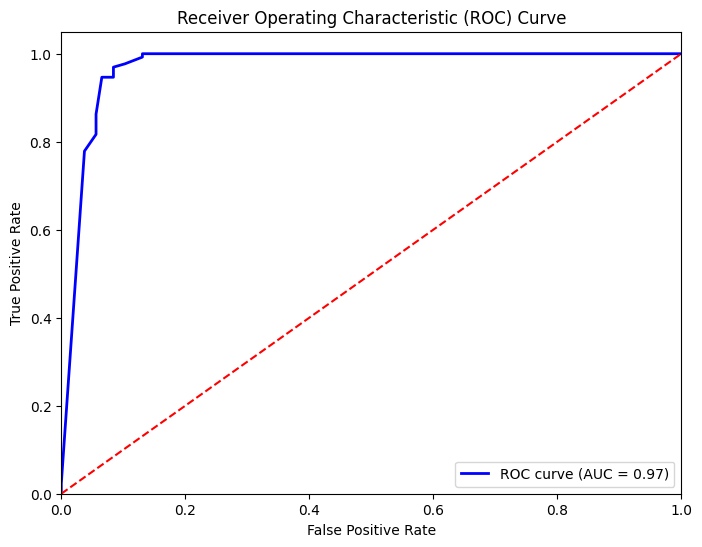

In [144]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

#############################################################################
## TODO: plot roc_curve for Ensemble model you created previously
#############################################################################

# Plot ROC curve for Ensemble model
y_pred_proba = classifiers['Ensemble Classifier'].predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#############################################################################
## TODO: what this plot can show us that other metrics like Accuracy can't:
## Your Comment:
# The ROC curve shows the trade-off between sensitivity (recall) and specificity
# (1 - false positive rate) across different thresholds. It provides a more comprehensive
# understanding of the model's performance, especially in terms of how well it can
# distinguish between classes. Unlike accuracy, which gives a single performance measure,
# the ROC curve shows the performance across all threshold levels and helps identify the
# threshold that balances sensitivity and specificity for a specific application.
# The AUC (Area Under the Curve) gives an aggregate measure of the model's performance
# across all thresholds, which can help in comparing the discriminative power of different
# models. This plot can highlight situations where a model might have a high accuracy but
# still perform poorly in terms of distinguishing between the positive and negative classes.
# In our case, the AUC of 0.97 indicates that our ensemble model has a very high ability
# to distinguish between the positive and negative classes, even if the overall accuracy
# might not fully reflect this performance.
#############################################################################